# Import libraries

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
from matplotlib import pyplot

# Load Data

In [24]:

X = pd.read_csv('../dataset/XbaseCher_Bvot.csv', sep=';', index_col=[0,1,2,3])
y = pd.read_csv('../dataset/labels/yDataCher_Canton_DP.csv', sep=';', index_col=[0,1])

yCols = ['target_'+c for c in y.columns]
XCols = X.columns
y.columns = yCols

X.index.get_level_values('CODCAN')

Int64Index([15,  8, 14, 15, 11, 17, 10, 17,  8,  8,
            ...
            15,  2,  8, 16,  7,  2, 16, 17,  2, 15],
           dtype='int64', name='CODCAN', length=443)

## Select data

In [3]:
mask = np.random.rand(len(fusion)) < 0.8

trainset = fusion[mask]
testset = fusion[~mask]

X_train = trainset[XCols]
y_train = trainset[yCols]
X_test = testset[XCols]
y_test = testset[yCols]

print(X_train.shape, y_train.shape)

(346, 16) (346, 8)


# Build Model

## Initialization

In [7]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(32, input_dim=16, activation='relu', kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dense(8, activation='softmax'))

opt = tf.keras.optimizers.SGD(learning_rate=0.007, momentum=0.5)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

## Training and evaluation

Train: 0.908, Test: 0.887


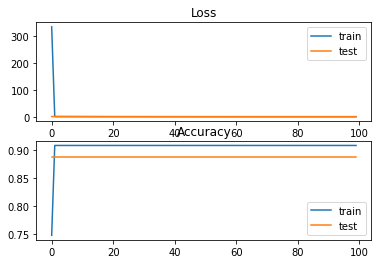

In [9]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0)

# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()